# 05 Publication Quality Plots

This notebook demonstrates the new publication-quality plotting module.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hydrograph_lab.io import read_hydrograph
from hydrograph_lab.plotting_pub import (
    enable_publication_style,
    plot_hydrograph_pub,
    plot_model_comparison_pub,
    plot_fdc,
    plot_hydrograph_with_events,
    plot_residuals
)

## 1. Setup Style

In [18]:
enable_publication_style()

## 2. Load Data
We'll load the observed data and create some synthetic simulated data for demonstration.

In [19]:
try:
    obs_df = read_hydrograph("../obs.csv", value_col="Q_obs")
    # Create synthetic sim data that looks somewhat realistic
    sim_df = obs_df.copy()
    # Add some noise and lag
    sim_df["Q_sim"] = obs_df["Q_obs"] * 0.9 + np.random.normal(0, 1.0, len(obs_df))
    sim_df["Q_sim"] = sim_df["Q_sim"].shift(1).fillna(0)
    sim_df["Q_sim"] = sim_df["Q_sim"].clip(lower=0)
except FileNotFoundError:
    # Fallback dummy data
    dates = pd.date_range("2024-01-01", periods=100, freq="H")
    obs_df = pd.DataFrame({"Q_obs": np.abs(np.sin(np.linspace(0, 10, 100)) * 10)}, index=dates)
    sim_df = pd.DataFrame({"Q_sim": np.abs(np.sin(np.linspace(0, 10, 100)) * 9 + 1)}, index=dates)

obs = obs_df.iloc[:, 0]
sim = sim_df.iloc[:, 0]

print(f"Data loaded: {len(obs)} points")

Data loaded: 24 points


## 3. Publication Hydrograph

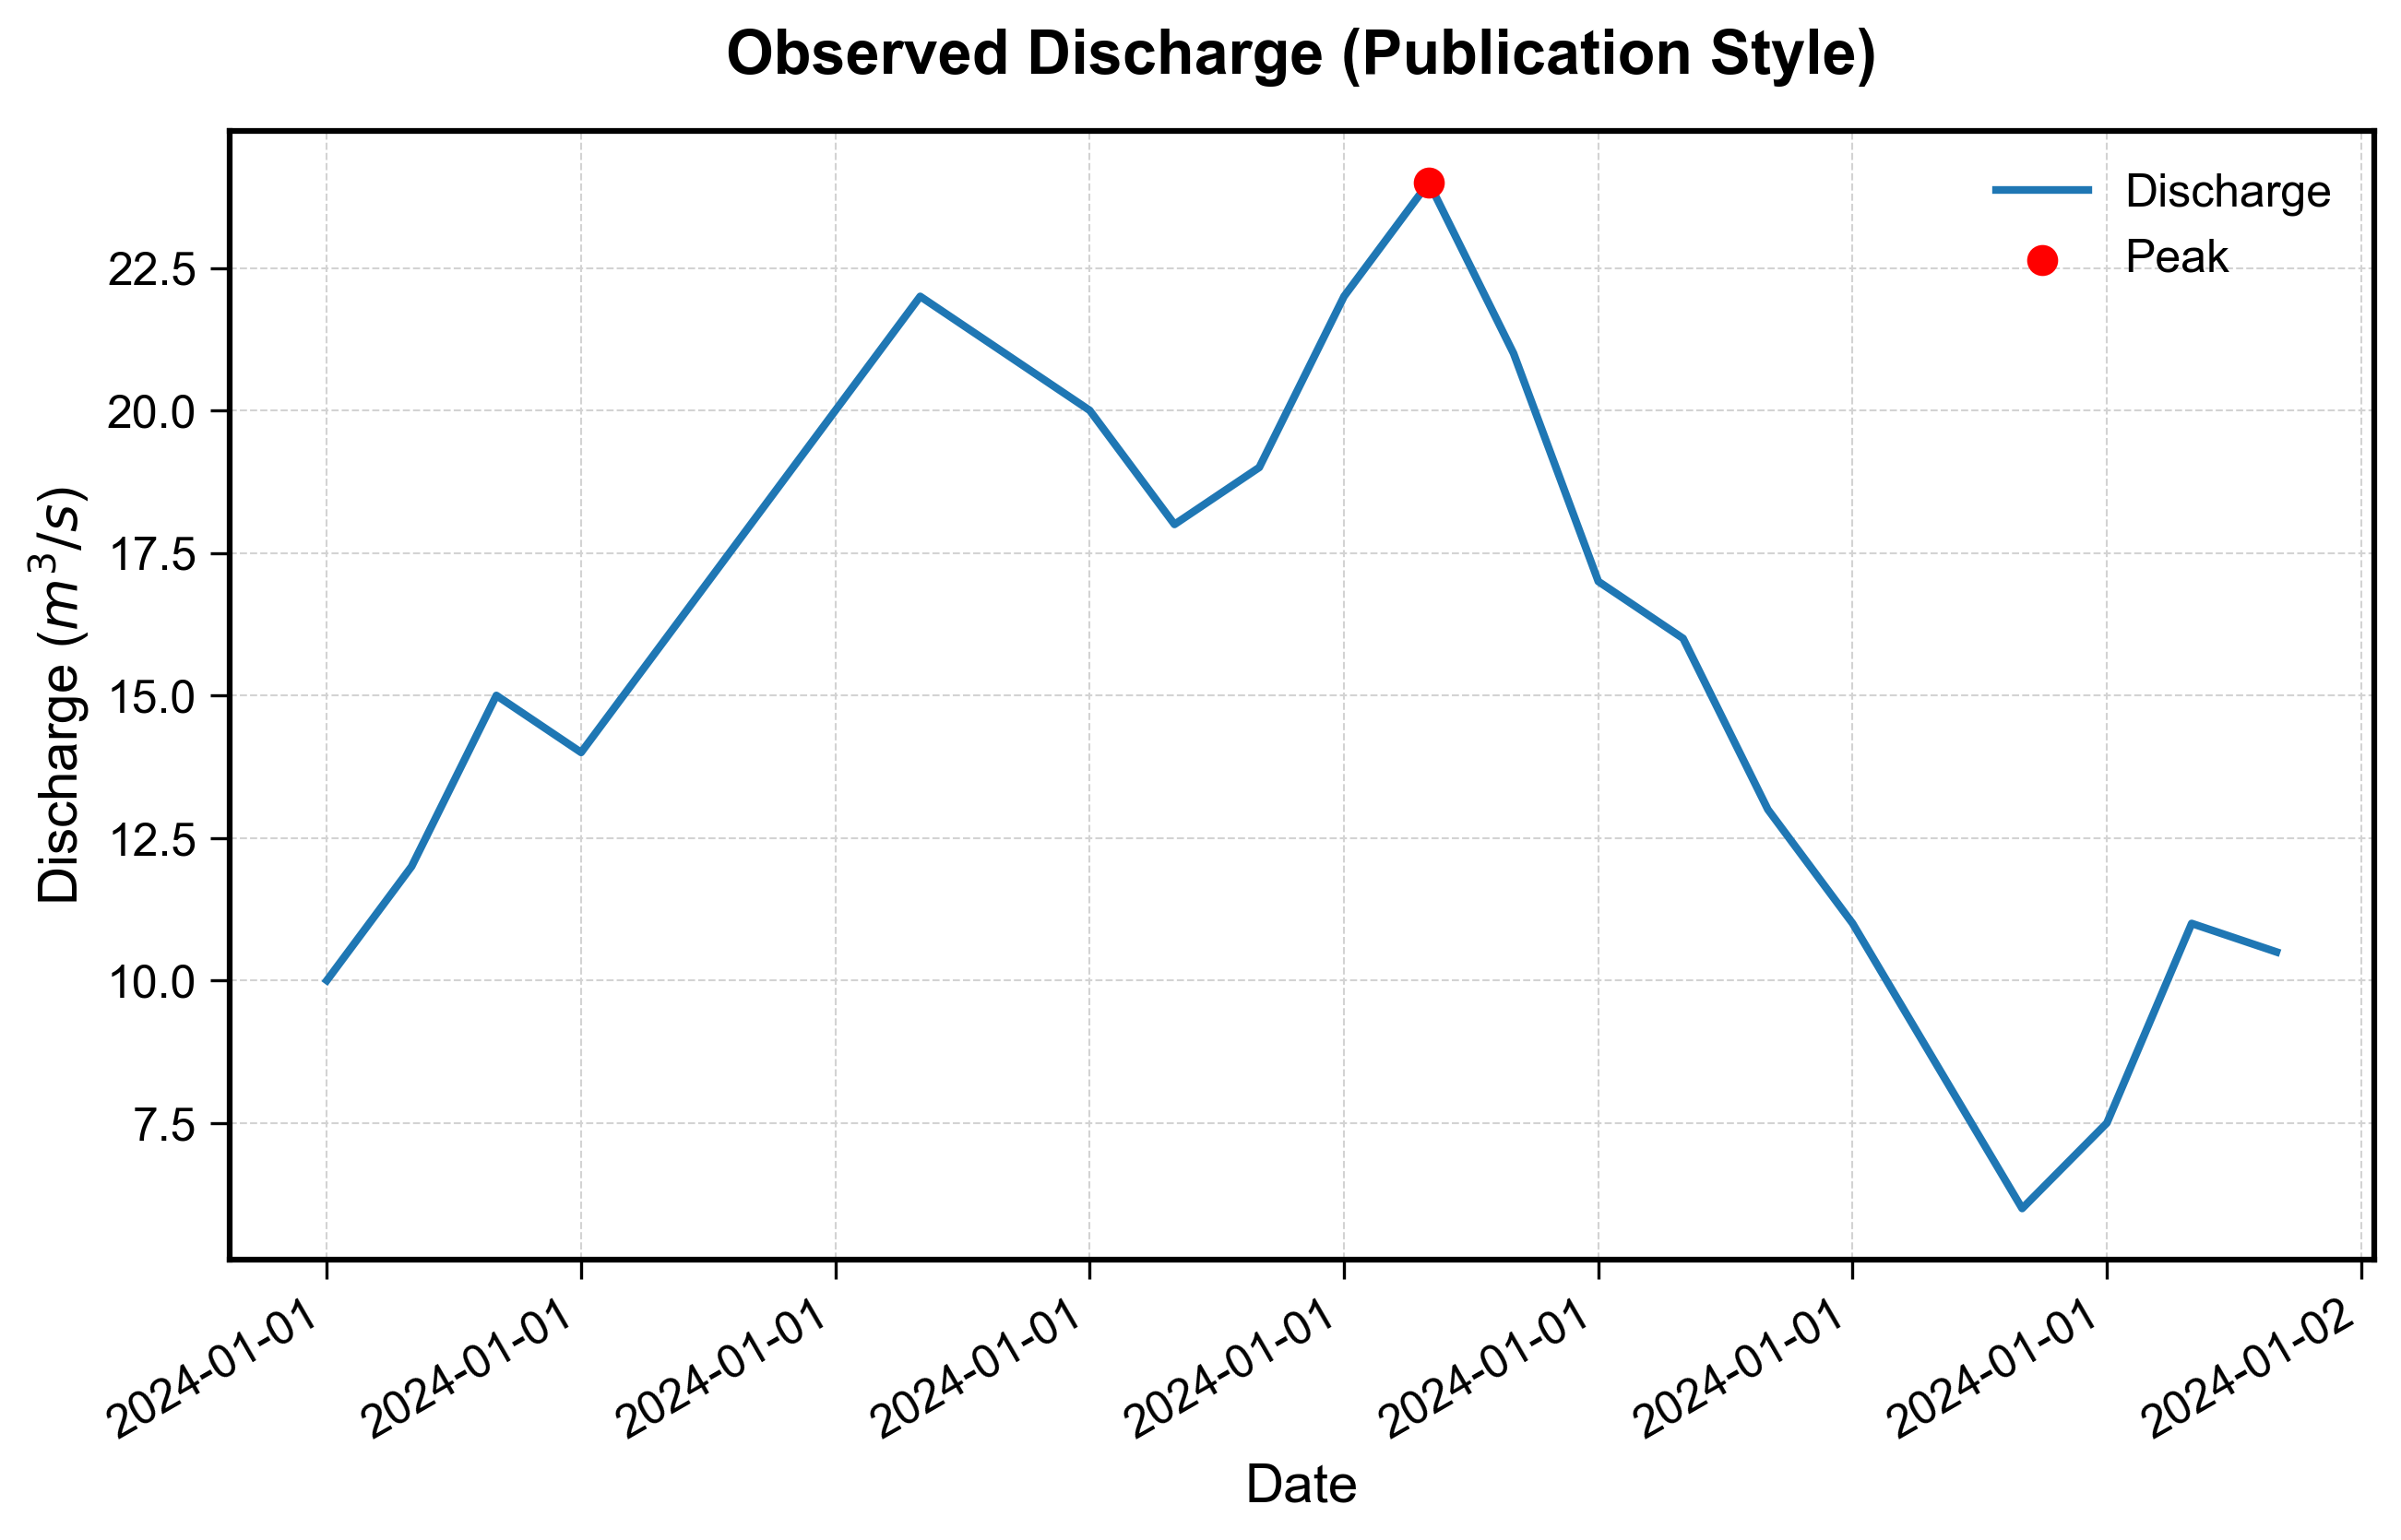

In [20]:
plot_hydrograph_pub(obs_df, title="Observed Discharge (Publication Style)", obs_col=obs_df.columns[0])

## 4. Model Comparison (2-Panel)

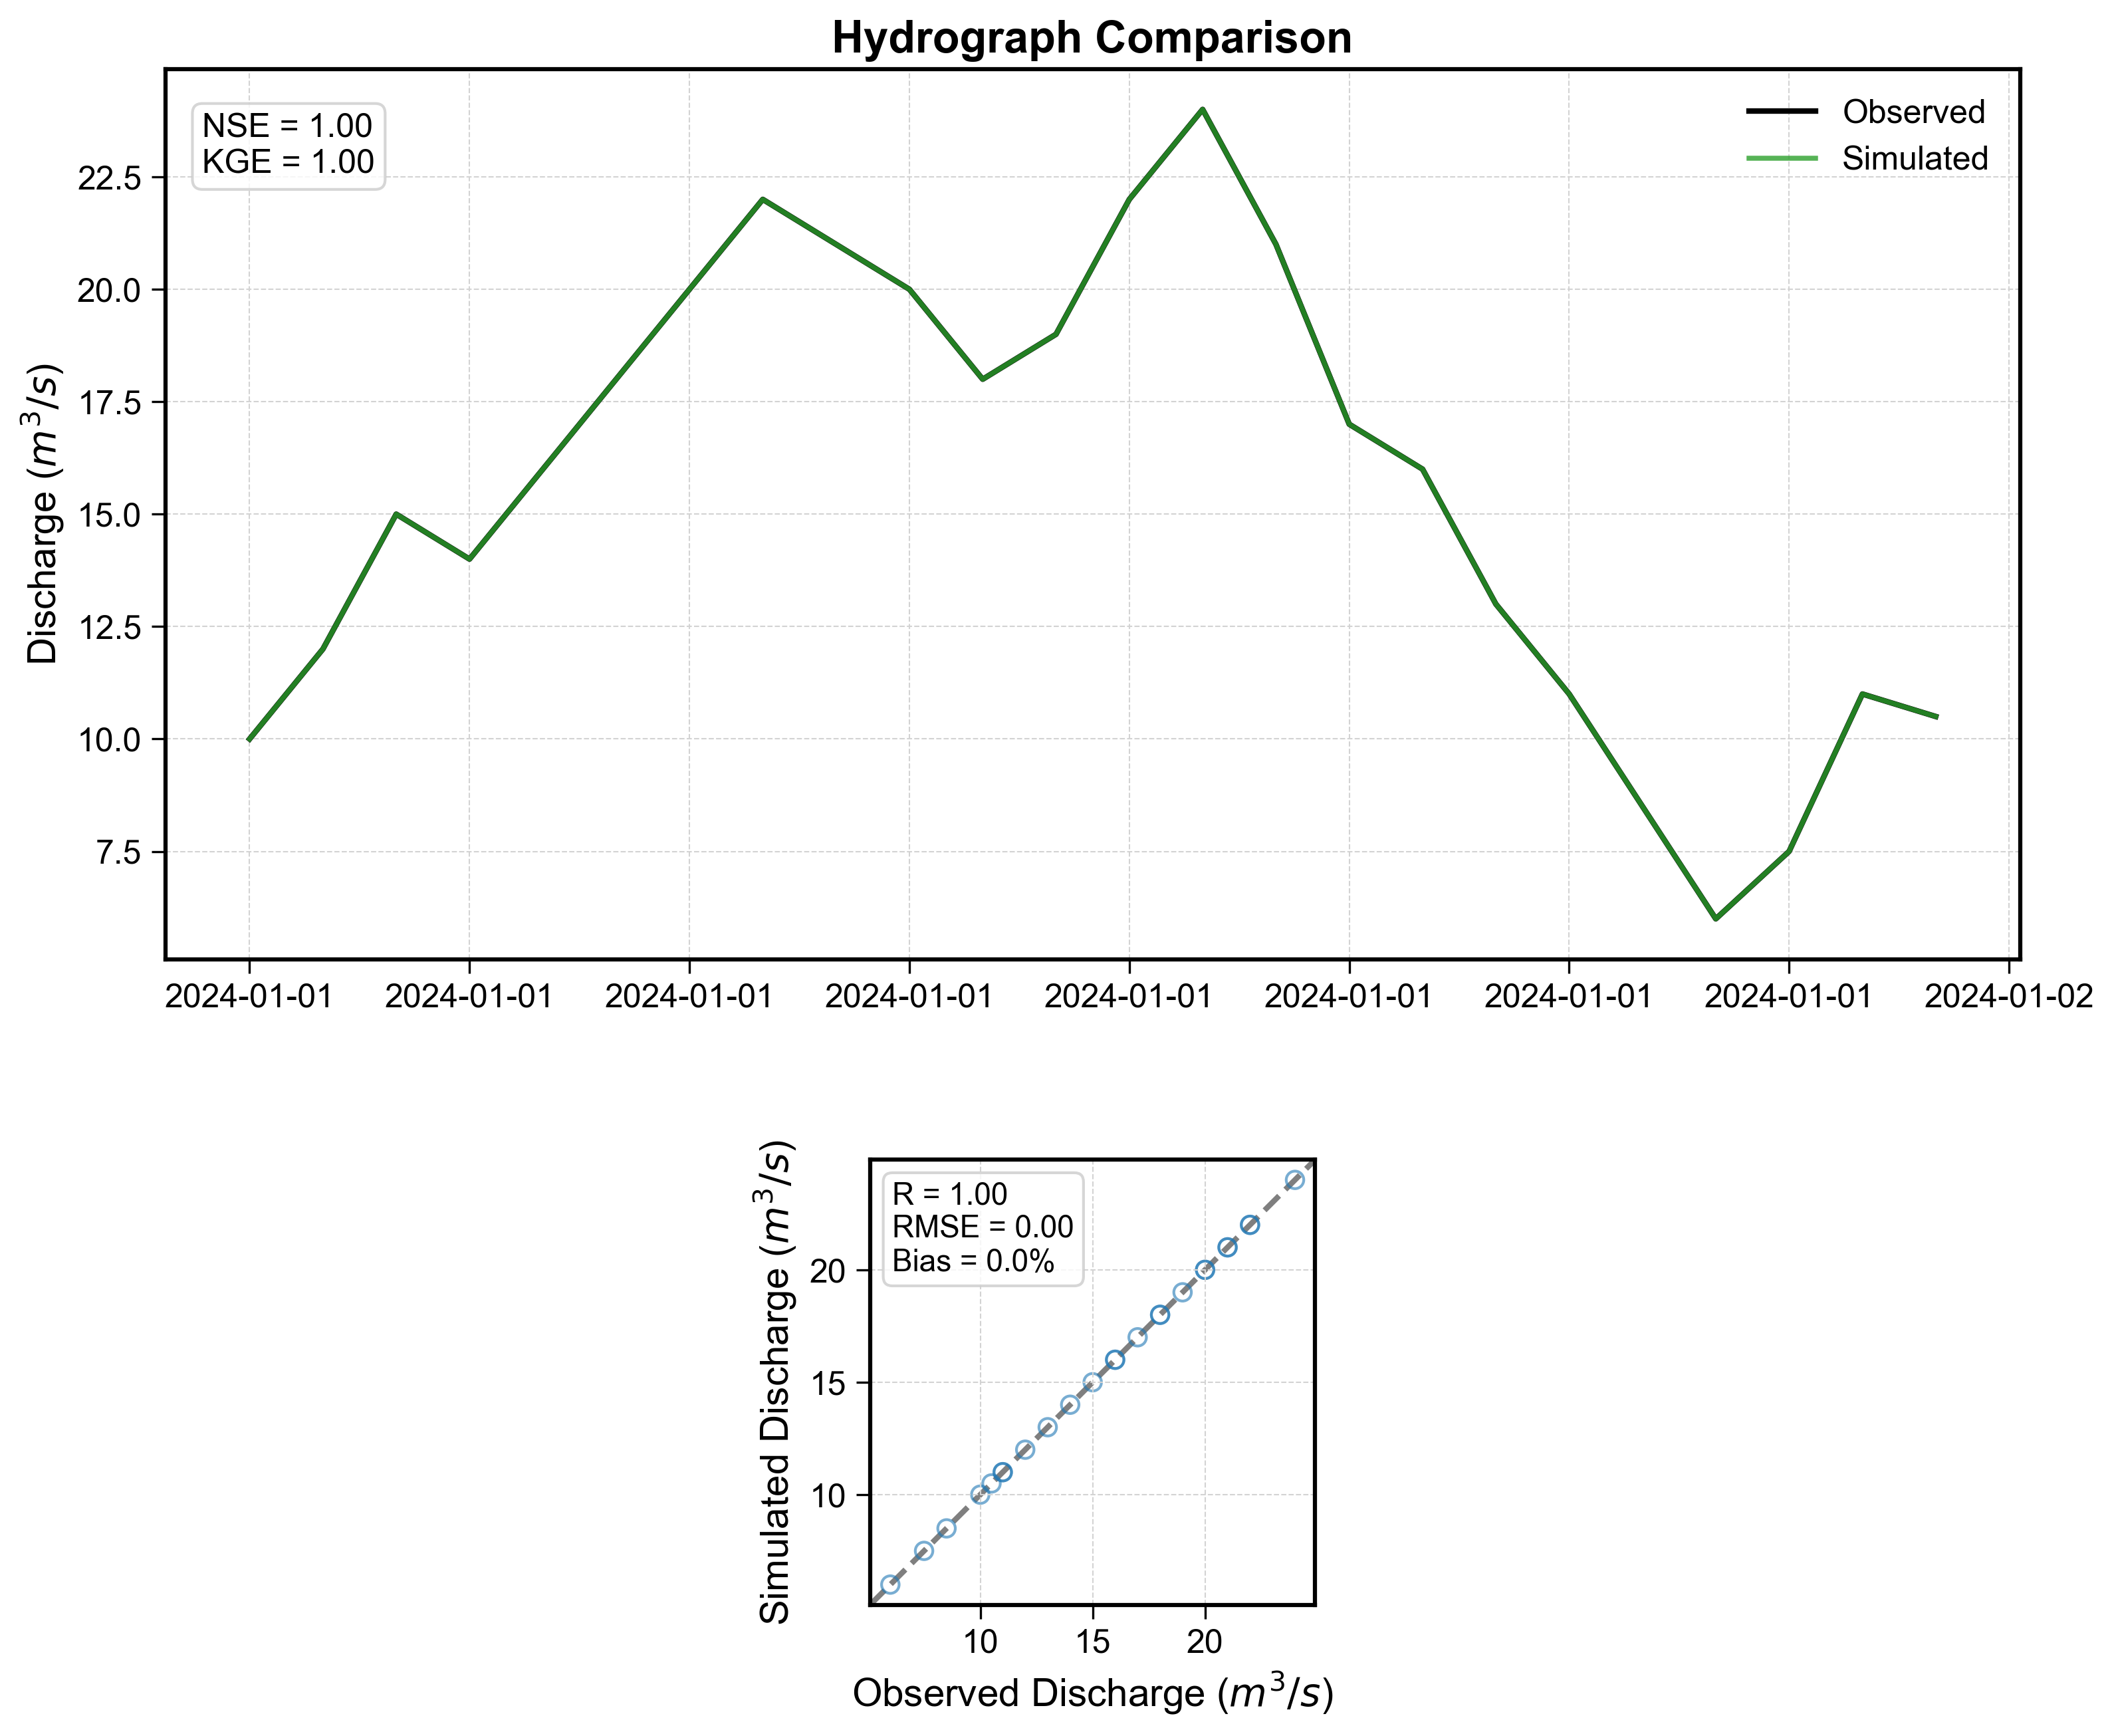

In [21]:
plot_model_comparison_pub(obs, sim)

## 5. Flow Duration Curve (FDC)

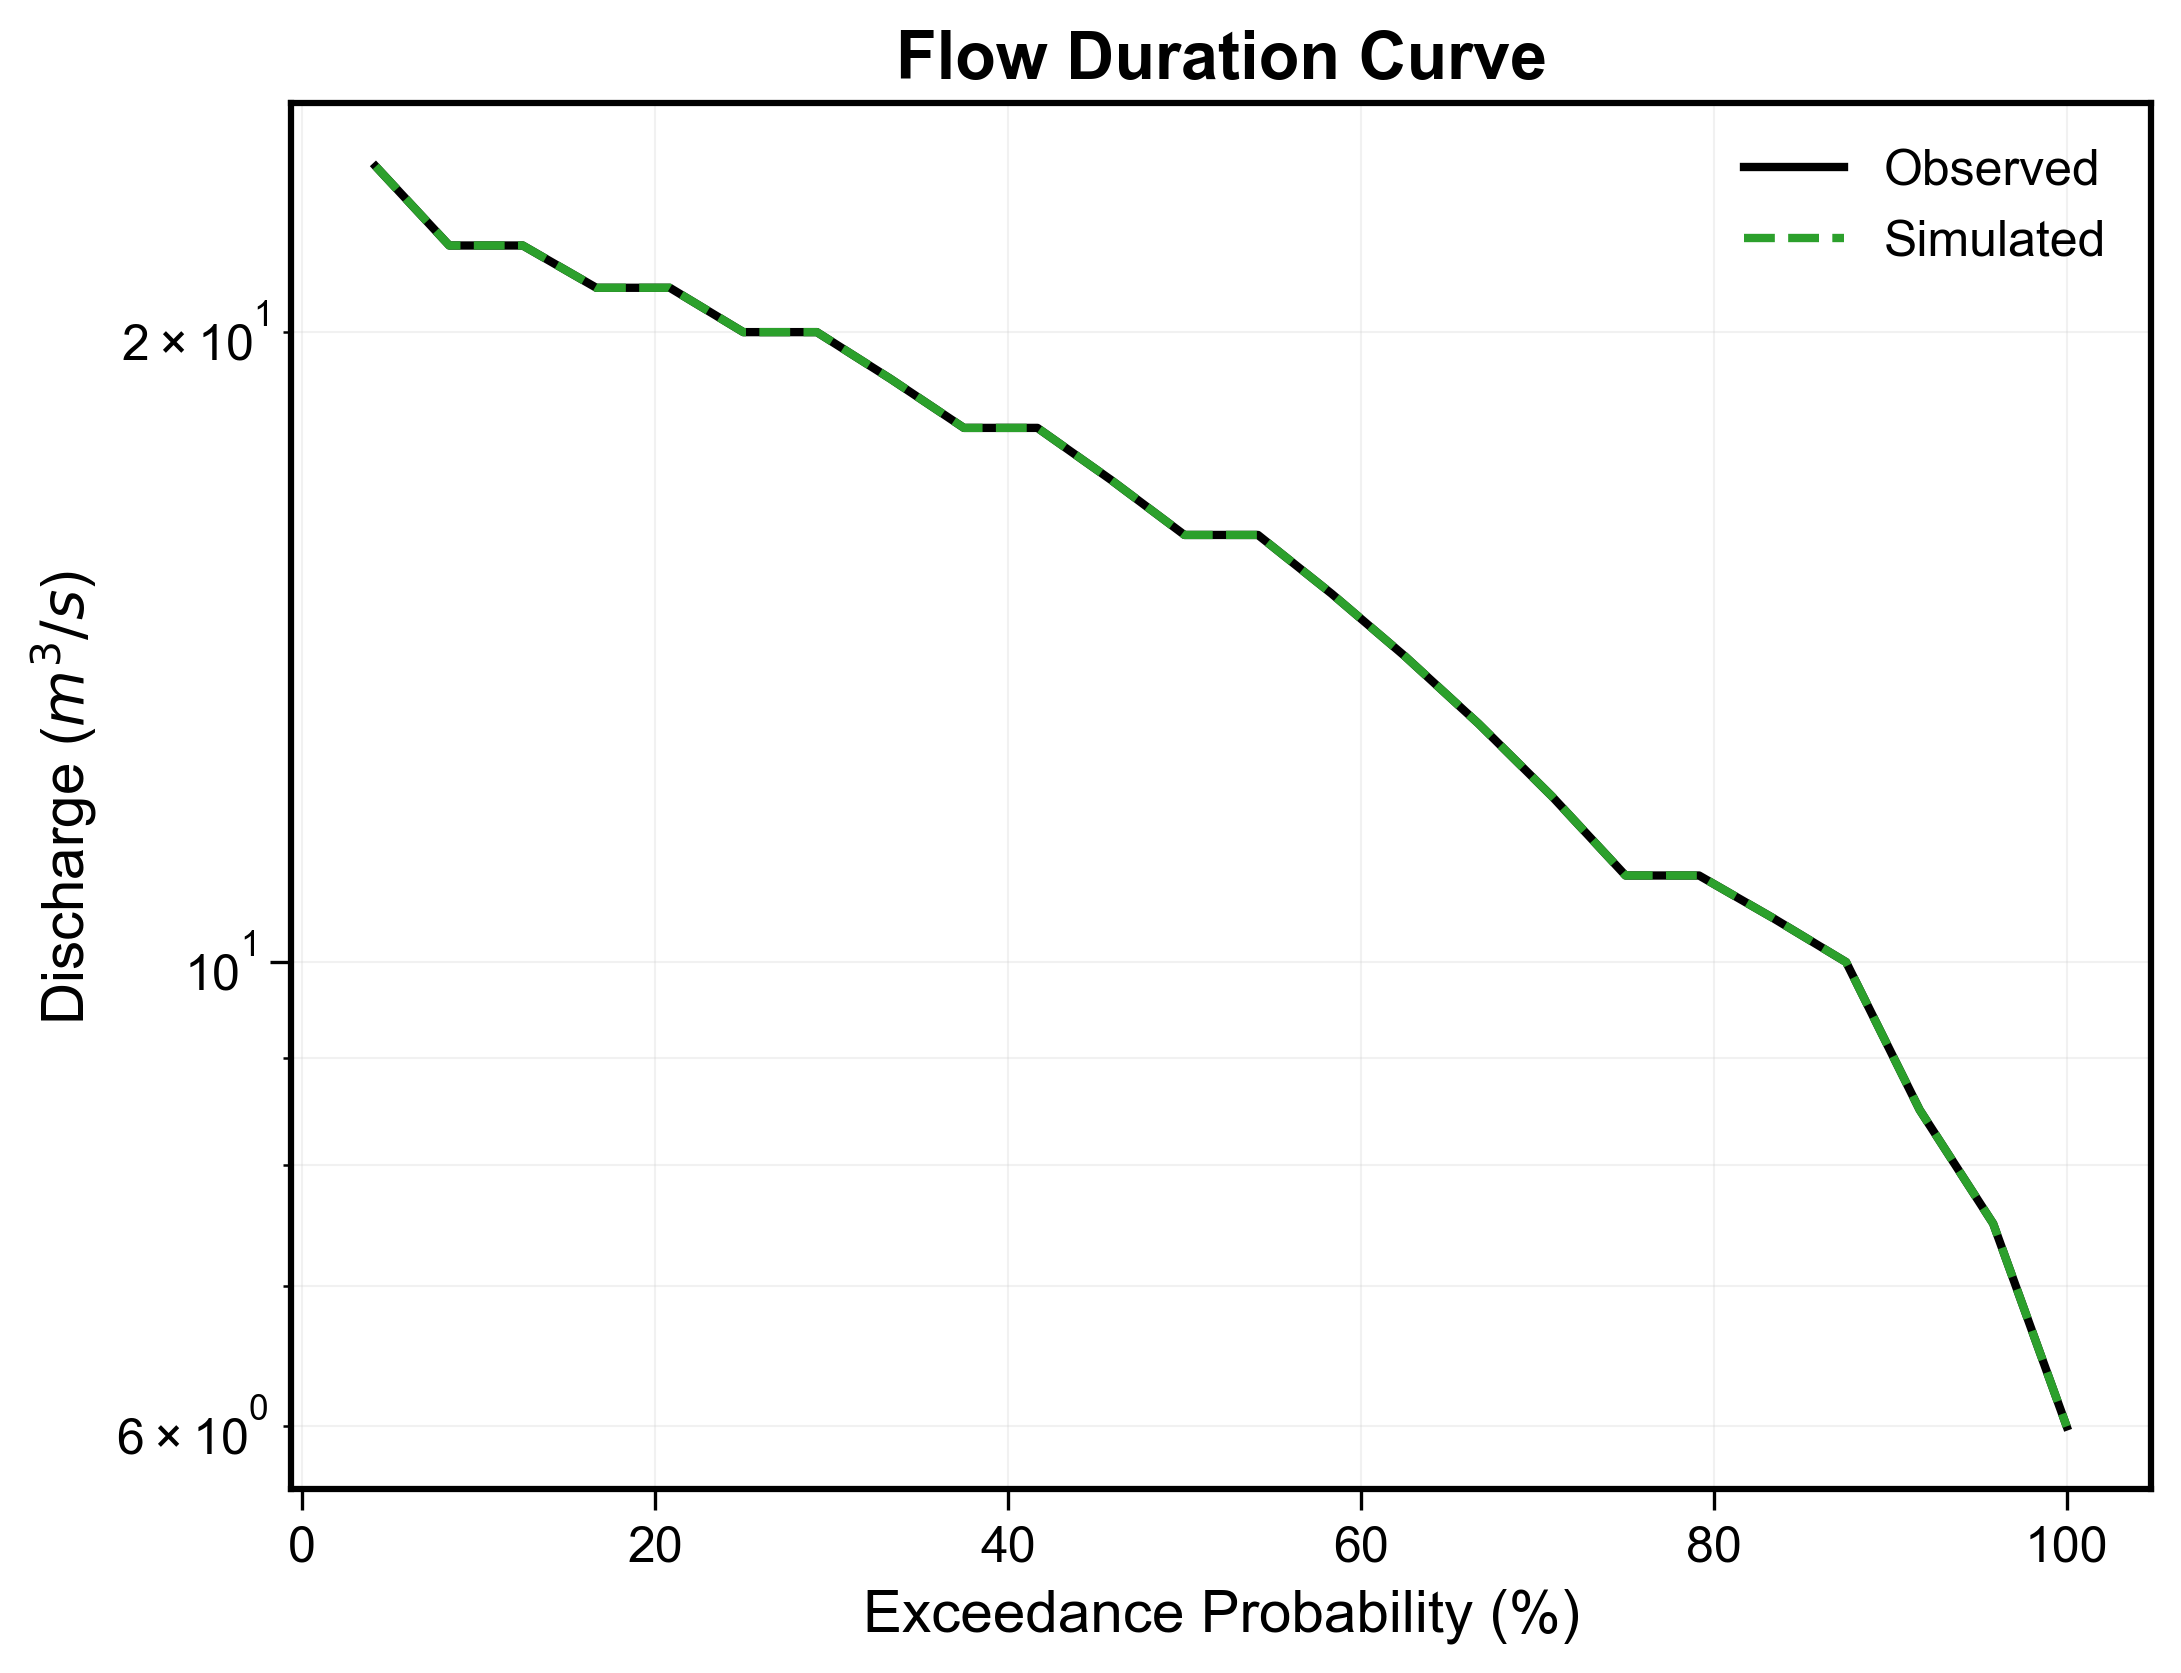

In [22]:
plot_fdc(obs, sim=sim, log_scale=True)

## 6. Hydrograph with Events

In [ ]:
# Define some dummy events
events = [
    (str(obs.index[5]), str(obs.index[10])),
    (str(obs.index[15]), str(obs.index[20]))
]
plot_hydrograph_with_events(obs_df, events, value_col=obs_df.columns[0])

IndexError: index 30 is out of bounds for axis 0 with size 24

## 7. Residuals Plot

In [ ]:
plot_residuals(obs, sim)